In [1]:
import numpy as np
import pandas as pd
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
#Import the mobileNet ConvNet from keras library 
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input

In [3]:
base_model = MobileNet(weights = 'imagenet', include_top = False) #Discards the last Dense layer with 1000 output neurons (classes)

x = base_model.output # This will work as the output from the imagenet and allow to train the last layers
x = GlobalAveragePooling2D()(x) # This layer will receive the output
x = Dense(1024, activation='relu')(x) #Add Dense layers for the CNN lears complex functions adequated to the required needs
x = Dense(1024, activation ='relu')(x)
x = Dense(512, activation = 'relu')(x)
#Final layer that defines the classification in this case 3 classes

preds = Dense(3, activation = 'softmax')(x)


C:\Users\Mauricio\Anaconda3\envs\opencv_env\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [4]:
transfer_model = Model(inputs = base_model.input, outputs = preds)

In [5]:
#Defining which layer weights will be trainable. For this the first 20 layers of the imagenet will not be trainable
for layer in transfer_model.layers[:20]:
    layer.trainable = False
for layer in transfer_model.layers[20:]:
    layer.trainable = True

In [6]:
#Transform the dataset to fit the expected input shape for imagenet. Also transforms inputs as desired
#Need to declare the path folder for the images. Classes will be specified by the folder name. 
input_path = './train/'

train_datagen = ImageDataGenerator(preprocessing_function= preprocess_input, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(directory = input_path, 
                                                    target_size = (224,224), subset='training',
                                                    color_mode='rgb', batch_size=32, class_mode='categorical', shuffle=True)
validation_generator = train_datagen.flow_from_directory(directory = input_path, 
                                                    target_size = (224,224), subset='validation',
                                                    color_mode='rgb', batch_size=32, class_mode='categorical', shuffle=True)

Found 158 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [7]:
#Compiling the model to optimize 

transfer_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

train_step_size = train_generator.samples//train_generator.batch_size
validation_step_size = validation_generator.samples//validation_generator.batch_size


In [8]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience=5)

In [9]:
train_history = transfer_model.fit_generator(generator = train_generator,validation_data=validation_generator, 
                             steps_per_epoch= train_step_size, validation_steps= validation_step_size, epochs = 20, callbacks=[early_stopping])

Epoch 1/20


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv1/convolution (defined at C:\Users\Mauricio\Anaconda3\envs\opencv_env\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_17380]

Function call stack:
keras_scratch_graph


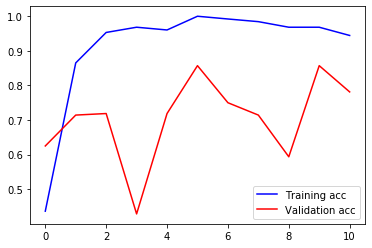

In [12]:
epochs_plot_drop = range(len(train_history.history['loss']))
plt.figure()
plt.plot(epochs_plot_drop, train_history.history['accuracy'], 'b', label='Training acc' )
plt.plot(epochs_plot_drop, train_history.history['val_accuracy'], 'r', label='Validation acc')
plt.legend()
plt.show()

Looking for an example to show

In [1]:
from skimage.transform import rescale, resize, downscale_local_mean

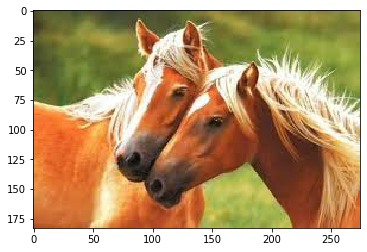

In [131]:
horses = input_path + 'horses/images (2).jpg'
image_horses = plt.imread(horses)
plt.imshow(images_horses)


In [2]:
img_dims = 224
images_horses = resize(images_horses, (img_dims, img_dims))
images_horses_reshape = images_horses.reshape(1,img_dims, img_dims, 3)
pred = transfer_model.predict(images_horses_reshape)
print(pred)

NameError: name 'd' is not defined

(224, 224, 3)


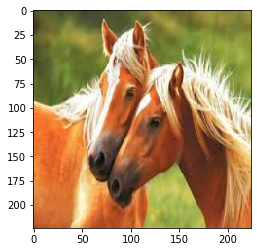

In [133]:
plt.imshow(d)
print(d.shape)

In [134]:
d_reshape = d.reshape(1,img_dims, img_dims, 3)
print(d.shape)
print(d_reshape.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [135]:
pred = transfer_model.predict(d_reshape)

In [136]:
print(pred)

[[4.6671677e-02 1.6774651e-05 9.5331156e-01]]
